Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
root_dir="./"

In [80]:
dataset_dir=root_dir+"CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/"

In [87]:
##remove space from name for augmentor
dataset_dir_updated=root_dir+"CNN_assignment/dataset/"
os.rename(dataset_dir,dataset_dir_updated)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/' -> 'CNN_assignment/dataset/'

In [88]:
dataset_train_path=root_dir+dataset_dir_updated+"Train"
dataset_test_path=root_dir+dataset_dir_updated+"Test"

In [90]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(root_dir+dataset_train_path)
data_dir_test = pathlib.Path(root_dir+dataset_test_path)

In [91]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [20]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [21]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(directory=data_dir_train,
                                                       image_size=(img_height, img_height),
                                                      validation_split=0.2,subset='training',
                                                       label_mode='categorical',
                                                      seed=123)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [22]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(directory=data_dir_train,
                                                       image_size=(img_height, img_height),
                                                      validation_split=0.2,subset='validation',
                                                     label_mode='categorical',
                                                      seed=123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [23]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num_classes=len(class_names)
print(num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

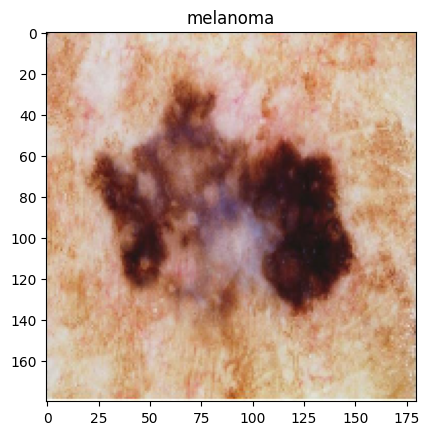

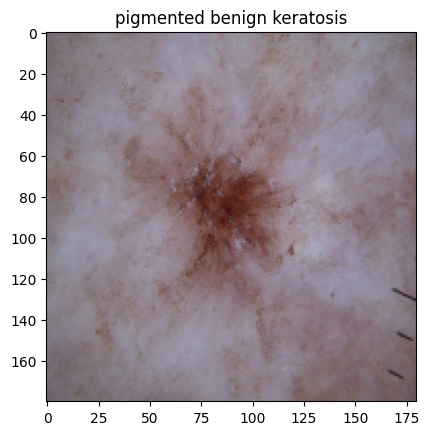

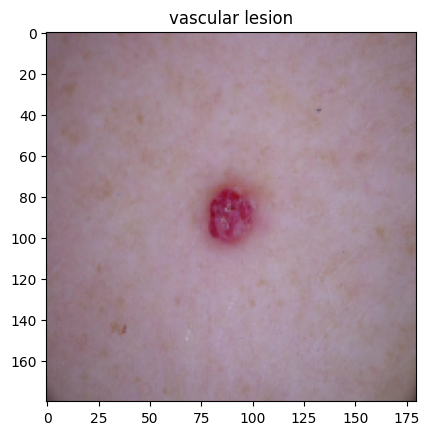

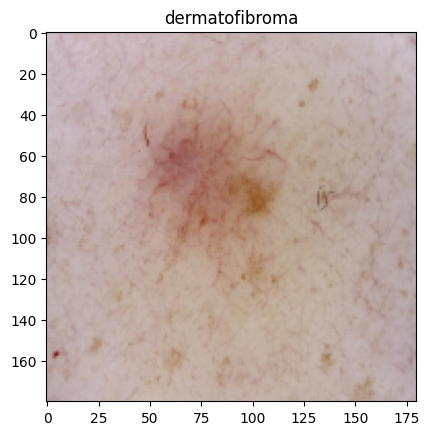

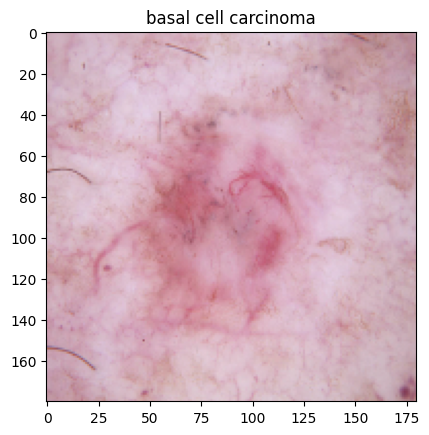

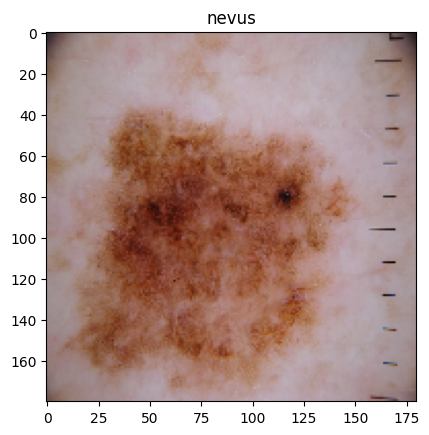

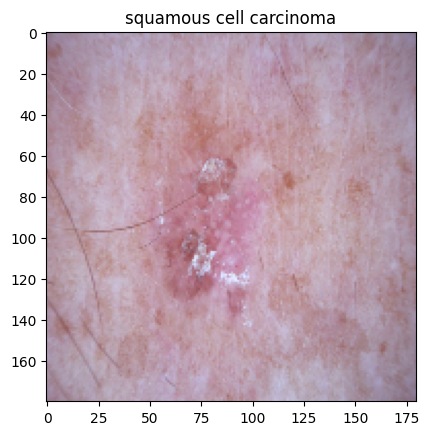

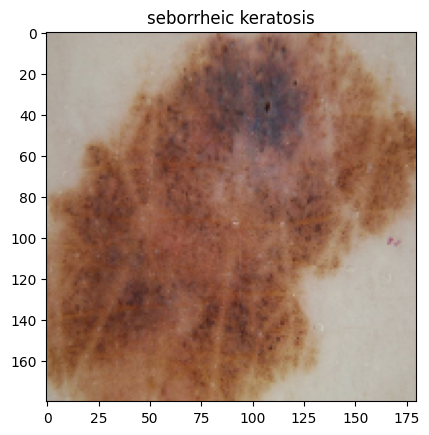

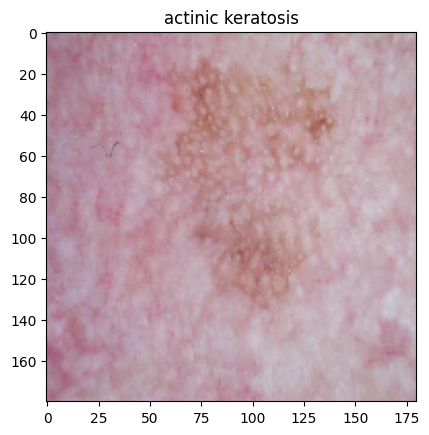

In [24]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
data_iter=iter(val_ds)
s=set()

while len(s)<9:
    d,l=next(data_iter)  
   # print(l.numpy())
    for i in range(0,32):  
        for j in range(0,num_classes):
            t=l[i].numpy()[j]
            if(t==1):
                if j not in s:
                    s.add(j)
                    plt.figure()
                    plt.title(class_names[j])
                    plt.imshow(d[i]/255)
                    
       
    



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras import layers

In [27]:
rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])

In [30]:
### Your code goes here
model = Sequential()
model.add(keras.Input(shape=(img_height, img_width, 3)))
model.add(rescale)

model.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(9,activation='softmax'))


In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 128)      

In [32]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [33]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 17s 90ms/step - loss: 2.0494 - accuracy: 0.2305 - val_loss: 1.8701 - val_accuracy: 0.3244
Epoch 2/20
56/56 [==============================] - 3s 61ms/step - loss: 1.7579 - accuracy: 0.3544 - val_loss: 1.6957 - val_accuracy: 0.3512
Epoch 3/20
56/56 [==============================] - 4s 63ms/step - loss: 1.5745 - accuracy: 0.4381 - val_loss: 1.5432 - val_accuracy: 0.4720
Epoch 4/20
56/56 [==============================] - 3s 61ms/step - loss: 1.4849 - accuracy: 0.4900 - val_loss: 1.4314 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 3s 62ms/step - loss: 1.2994 - accuracy: 0.5502 - val_loss: 1.3730 - val_accuracy: 0.5414
Epoch 6/20
56/56 [==============================] - 3s 61ms/step - loss: 1.2114 - accuracy: 0.5681 - val_loss: 1.5961 - val_accuracy: 0.4698
Epoch 7/20
56/56 [==============================] - 3s 62ms/step - loss: 1.1548 - accuracy: 0.6021 - val_loss: 1.4390 - val_accuracy: 0.5056
Epoch 8/20
5

### Visualizing training results

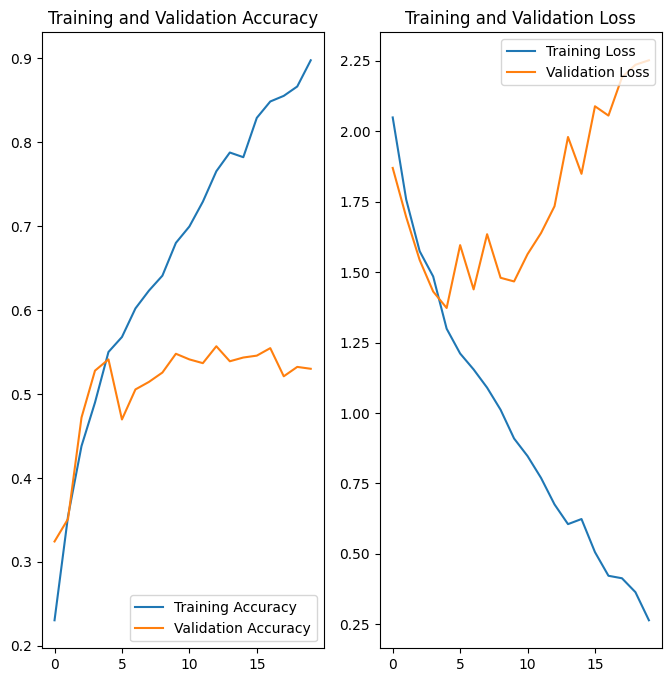

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

### The model is overfitting because
   - Validation loss is increasing after some epochs
   - There is huge gap between training and valiation accuracies

###  Lets add random rotaion and flipping as augmentation strategy

In [35]:

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  
])

In [36]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Visualize augmentation

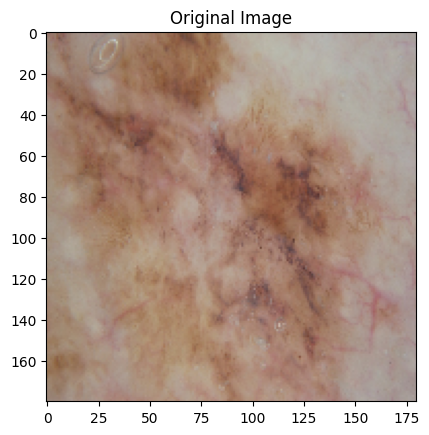

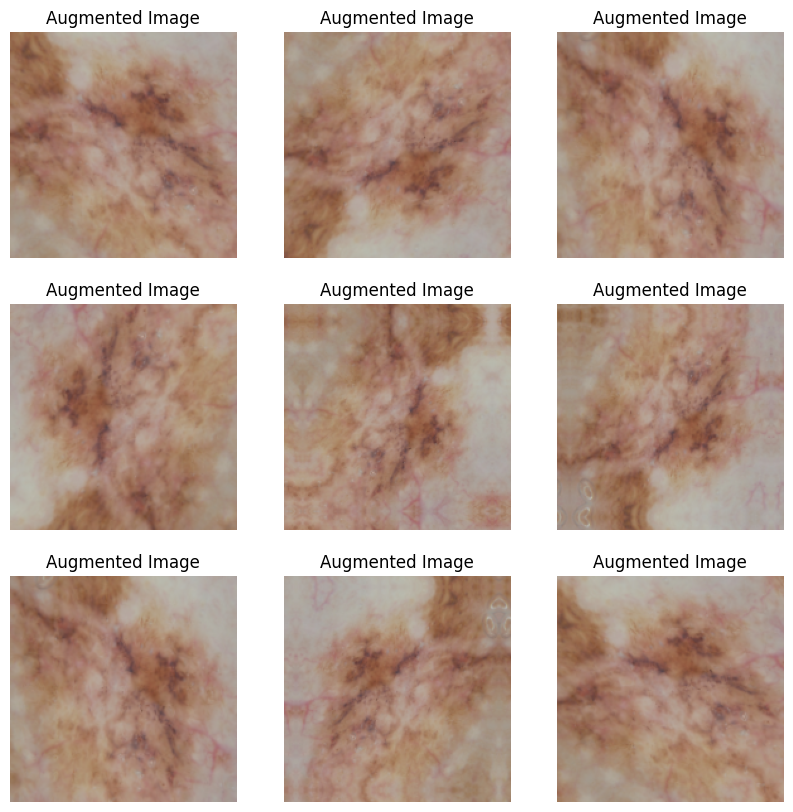

In [37]:


for image,label in train_ds.take(1):
    plt.title("Original Image")
    plt.imshow(image[0]/255)   
    plt.figure(figsize=(10, 10))
    for i in range(9):
        augmented_image = data_augmentation(image[0])
        ax = plt.subplot(3, 3, i + 1)  
        plt.title("Augmented Image")
        plt.imshow(augmented_image/255)
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


### As model is also overfitted lets add dropout layer



In [38]:
data_rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2)
  
])

In [39]:
model_2 = Sequential()
model_2.add(keras.Input(shape=(img_height, img_width, 3)))

model_2.add(data_augmentation)
model_2.add(data_rescale)

model_2.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))



model_2.add(Flatten())
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(9,activation='softmax'))


### Compiling the model

In [40]:
### Todo, choose an appropirate optimiser and loss function
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

### Training the model

In [41]:
epochs = 20
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 25s 393ms/step - loss: 2.3981 - accuracy: 0.1970 - val_loss: 1.9539 - val_accuracy: 0.2975
Epoch 2/20
56/56 [==============================] - 22s 386ms/step - loss: 1.8985 - accuracy: 0.2946 - val_loss: 1.8738 - val_accuracy: 0.3378
Epoch 3/20
56/56 [==============================] - 21s 370ms/step - loss: 1.7635 - accuracy: 0.3717 - val_loss: 1.7058 - val_accuracy: 0.3893
Epoch 4/20
56/56 [==============================] - 21s 381ms/step - loss: 1.6700 - accuracy: 0.3850 - val_loss: 1.6550 - val_accuracy: 0.4295
Epoch 5/20
56/56 [==============================] - 21s 384ms/step - loss: 1.6889 - accuracy: 0.3873 - val_loss: 1.6249 - val_accuracy: 0.4251
Epoch 6/20
56/56 [==============================] - 21s 383ms/step - loss: 1.6321 - accuracy: 0.4079 - val_loss: 1.5962 - val_accuracy: 0.4072
Epoch 7/20
56/56 [==============================] - 21s 378ms/step - loss: 1.6028 - accuracy: 0.4375 - val_loss: 1.5555 - val_accuracy: 0.4720

### Visualizing the results

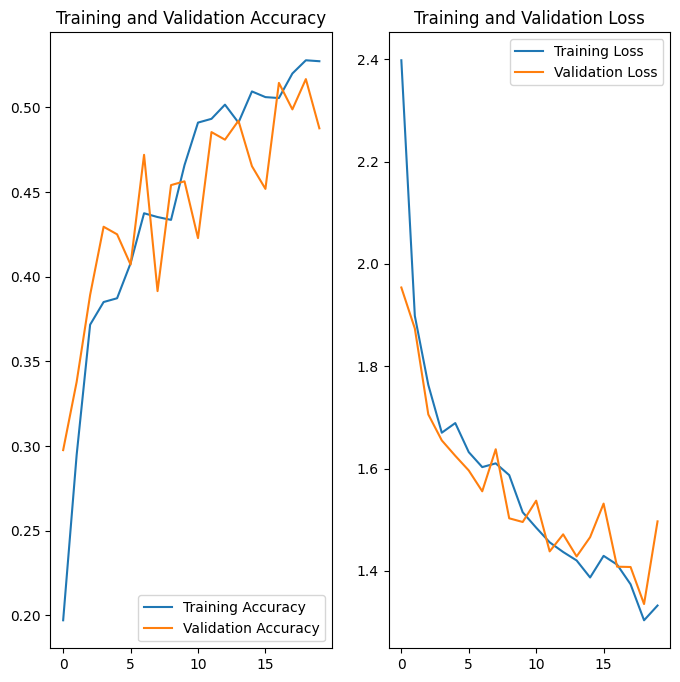

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings 
- After adding dropout and augementation model is no more overfit. Training accuracy and validation accuracy is closer
- However the model training accuracy dropped a lot. model seems to be overfit
- need to verify data for class imbalance

In [44]:
name=[]
count=[]
for path in pathlib.Path(data_dir_train).iterdir():
    if path.is_dir():
        name.append(path.name)
        count.append(len(os.listdir(path)))
img_cnts=zip(name,count)
print(*list(img_cnts),sep = "\n")
   
    

('actinic keratosis', 114)
('basal cell carcinoma', 376)
('dermatofibroma', 95)
('melanoma', 438)
('nevus', 357)
('pigmented benign keratosis', 462)
('seborrheic keratosis', 77)
('squamous cell carcinoma', 181)
('vascular lesion', 139)


####  seborrheic keratosis has the list number of samples (77)

#### pigmented benign keratosis domintaes the data in terms of number of samples

### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [45]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [95]:
path_to_training_dataset=dataset_train_path+"/"
print(path_to_training_dataset)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)   
    
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

CNN_assignment/dataset/Train/
Initialised with 114 image(s) found.
Output directory set to CNN_assignment/dataset/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A67310BAC0>: 100%|█| 500/500 [00:02<00:00, 219.47 Samples


Initialised with 376 image(s) found.
Output directory set to CNN_assignment/dataset/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A79BE82D40>: 100%|█| 500/500 [00:02<00:00, 209.65 Samples


Initialised with 95 image(s) found.
Output directory set to CNN_assignment/dataset/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A644511F60>: 100%|█| 500/500 [00:02<00:00, 220.86 Samples


Initialised with 438 image(s) found.
Output directory set to CNN_assignment/dataset/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1A63360CD60>: 100%|█| 500/500 [00:12<00:00, 41.12 Samples


Initialised with 357 image(s) found.
Output directory set to CNN_assignment/dataset/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x1A79BCE52A0>: 100%|█| 500/500 [00:10<00:00, 45.89 Sample


Initialised with 462 image(s) found.
Output directory set to CNN_assignment/dataset/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A79C215AE0>: 100%|█| 500/500 [00:02<00:00, 170.51 Samples


Initialised with 77 image(s) found.
Output directory set to CNN_assignment/dataset/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1A77AC27100>: 100%|█| 500/500 [00:06<00:00, 74.57 Samples


Initialised with 181 image(s) found.
Output directory set to CNN_assignment/dataset/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A7B93CCA00>: 100%|█| 500/500 [00:02<00:00, 175.50 Samples


Initialised with 139 image(s) found.
Output directory set to CNN_assignment/dataset/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A79BB4F8B0>: 100%|█| 500/500 [00:03<00:00, 161.69 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [96]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [97]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['CNN_assignment\\dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0adab03f-02c2-4584-ac37-c75e73a9bead.jpg',
 'CNN_assignment\\dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3d193620-f5e7-4e40-8821-dce6cbea92e8.jpg',
 'CNN_assignment\\dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_42d4ba3a-3ec1-48bf-9b79-ca99370b1a1f.jpg',
 'CNN_assignment\\dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5c8242ea-1e5e-4744-ae00-2ada007c020a.jpg',
 'CNN_assignment\\dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_876d7f58-daf8-479d-95ba-8f40c9efff46.jpg',
 'CNN_assignment\\dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_0270421f-76ad-412a-a918-35ae22e266c3.jpg',
 'CNN_assignment\\dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_15d9498

In [98]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [99]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [100]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
df2

,Path,Label
0,CNN_assignment\dataset\Train\actinic keratosis...,actinic keratosis
1,CNN_assignment\dataset\Train\actinic keratosis...,actinic keratosis
2,CNN_assignment\dataset\Train\actinic keratosis...,actinic keratosis
3,CNN_assignment\dataset\Train\actinic keratosis...,actinic keratosis
4,CNN_assignment\dataset\Train\actinic keratosis...,actinic keratosis
...,...,...
4495,CNN_assignment\dataset\Train\vascular lesion\o...,vascular lesion
4496,CNN_assignment\dataset\Train\vascular lesion\o...,vascular lesion
4497,CNN_assignment\dataset\Train\vascular lesion\o...,vascular lesion
4498,CNN_assignment\dataset\Train\vascular lesion\o...,vascular lesion


In [101]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Train the model on the data created using Augmentor

In [102]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [103]:
data_dir_train="CNN_assignment\dataset\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [104]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size,
label_mode='categorical')

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [105]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [111]:
model_3 = Sequential()
model_3.add(keras.Input(shape=(img_height, img_width, 3)))

#model_3.add(data_augmentation) ##augmentation alredy applied through augmentor
model_3.add(data_rescale)

model_3.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))


model_3.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))


model_3.add(Flatten())
model_3.add(Dense(128,activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))


model_3.add(Dense(9,activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [112]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        1

#### **Todo:**  Train your model

In [113]:
tf.keras.backend.clear_session()
epochs = 30
## Your code goes here, use 50 epochs.
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 14s 79ms/step - loss: 2.0246 - accuracy: 0.3407 - val_loss: 5.9546 - val_accuracy: 0.1188
Epoch 2/30
169/169 [==============================] - 13s 79ms/step - loss: 1.5497 - accuracy: 0.4605 - val_loss: 4.7809 - val_accuracy: 0.1841
Epoch 3/30
169/169 [==============================] - 14s 83ms/step - loss: 1.2964 - accuracy: 0.5325 - val_loss: 1.5429 - val_accuracy: 0.4298
Epoch 4/30
169/169 [==============================] - 14s 84ms/step - loss: 1.0591 - accuracy: 0.6155 - val_loss: 1.9050 - val_accuracy: 0.3808
Epoch 5/30
169/169 [==============================] - 14s 84ms/step - loss: 0.8743 - accuracy: 0.6792 - val_loss: 1.4313 - val_accuracy: 0.4944
Epoch 6/30
169/169 [==============================] - 14s 84ms/step - loss: 0.7238 - accuracy: 0.7391 - val_loss: 0.9833 - val_accuracy: 0.6362
Epoch 7/30
169/169 [==============================] - 14s 84ms/step - loss: 0.5702 - accuracy: 0.7914 - val_loss: 0.6768 - val_accuracy:

#### **Todo:**  Visualize the model results

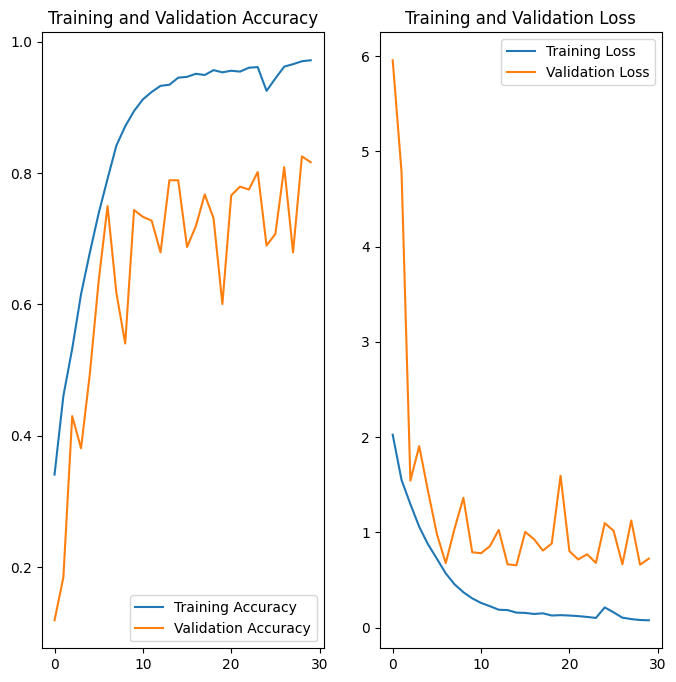

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Model losss decreased and model accuracy increased
- handling data imbalances help in addressing model underfitting and theryby increasing accuracy